In [2]:
import sys
!{sys.executable} -m pip install json_stream
import numpy as np
import pandas as pd
import json_stream
import json

Defaulting to user installation because normal site-packages is not writeable


In [3]:
with open("dawn-event-data.json") as f:
    data = json.load(f)
    print(len(data))
    print("DONE!")

11058699
DONE!


In [17]:
# Get player pos
def get_player_pos(id):
  pos = [x['position'] for x in data if x['userId'] == id]
  x = [pos[0] for pos in pos]
  y = [pos[1] for pos in pos]
  z = [pos[2] for pos in pos]
  return x,y,z

def get_player_pos_event(id, event):
  pos = [x['position'] for x in data if x['userId'] == id and event in x['events']]
  x = [pos[0] for pos in pos]
  y = [pos[1] for pos in pos]
  z = [pos[2] for pos in pos]
  return x,y,z

In [9]:
import matplotlib.pyplot as plt

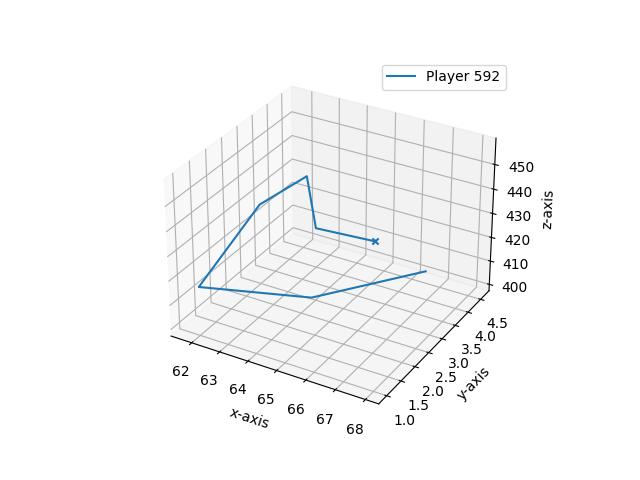

In [22]:
%matplotlib widget

import random

fig = plt.figure()
 
ax = plt.axes(projection ='3d')

for i in [random.randint(1,1000)]:
  x,y,z = get_player_pos_event(i, 'ping')
  x1, y1, z1 = get_player_pos_event(i, 'wingbuff_drop')
  ax.scatter(x[0],y[0],z[0], marker="x")
  ax.scatter(x1, y1, z1, marker="o")
  ax.plot3D(x, y, z, label=f'Player {i}')

ax.legend()
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.show()

In [12]:
start_times = {}
for skyevent in data:
    ID = skyevent["userId"]
    if ID not in start_times.keys():
        start_times[ID] = skyevent["time"]

In [16]:
end_times = {}
for i in reversed(range(len(data))):
    skyevent = data[i]
    ID = skyevent["userId"]
    if ID not in end_times.keys():
        end_times[ID] = skyevent["time"]

In [17]:
level_times = {}
for ID in start_times.keys():
    level_times[ID] = end_times[ID] - start_times[ID]

In [ ]:
level_times.values()

In [24]:
avg = np.average(list(level_times.values()))

In [26]:
avg/1000/60

44.80743531582321